
# 보일러 효율 영향 인자 분석 — **v5-fast**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# library & install
from google.colab import drive
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
import sys
import os

# Specify the path to the directory containing data_load.py
# Make sure this path is correct and accessible from your Colab environment
data_load_path = '/content/drive/MyDrive/utils'

# Add the directory to sys.path to allow importing modules from it
sys.path.append(data_load_path)

try:
    # Import the data_load module
    import data_load

    # Now you can use functions from the data_load module, for example:
    # from data_load import your_function_name
    # your_function_name()

    print("Successfully imported data_load.py")

except ImportError as e:
    print(f"Error importing data_load.py: {e}")
    print(f"Please ensure data_load.py exists at {os.path.join(data_load_path, 'data_load.py')} and the file name is correct.")

combined_df = data_load.load_data(start_date='2025-01-01', end_date='2025-09-14')

Successfully imported data_load.py
🔍 ['2025-01-01'부터 '2025-09-14'까지의 데이터를 로드]


/content/drive/MyDrive/utils/data_load.py:48: DtypeWarning: Columns (19,20,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(
/content/drive/MyDrive/utils/data_load.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs_to_concat, ignore_index=True)



✅ 총 257개 파일, 8474140개 행의 데이터를 성공적으로 합쳤습니다.


In [4]:
# Specify the path to the directory containing preprocessor.py
# Make sure this path is correct and accessible from your Colab environment
preprocessor_path = '/content/drive/MyDrive/utils'

# Add the directory to sys.path to allow importing modules from it
sys.path.append(preprocessor_path)

try:
    # Import the preprocessor module
    import preprocessor

    print("Successfully imported preprocessor.py")

except ImportError as e:
    print(f"Error importing preprocessor.py: {e}")
    print(f"Please ensure preprocessor.py exists at {os.path.join(preprocessor_path, 'preprocessor.py')} and the file name is correct.")

Successfully imported preprocessor.py


In [5]:
# Identify columns that are currently of object type
object_cols = combined_df.select_dtypes(include=['object']).columns

# Convert all values in object columns to string type to ensure uniform input for potential LabelEncoding within preprocessor.py
for col in object_cols:
    combined_df[col] = combined_df[col].astype(str)
    print(f"✅ 컬럼 '{col}'을(를) 문자열 타입으로 변환 완료")

combined_df = preprocessor.preprocessor(combined_df)



✅ 컬럼 '생성일'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '급수펌프 입력'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '배기가스온도2'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '배기가스온도3'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '배기 재 순환 온도'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '에코 온도1'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '에코 온도2'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '버너온도'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '재순환 O2'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '재순환 NOx'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '운전시간'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '확률 업데이트 시간'을(를) 문자열 타입으로 변환 완료
--- 데이터 전처리 시작 ---
✅ 1. 불필요한 컬럼 14개 제거 완료
✅ 2. '효율(순간)' 컬럼 값 100 미만으로 필터링 완료
✅ 3-1. 범주형 데이터 결측치 처리 완료
✅ 3-2. 범주형 변수 변환 완료
ℹ️ 3-3. 처리할 수치형 결측치가 없습니다.
✅ 4. 피처 스케일링 완료
--- 데이터 전처리 완료 ---


In [6]:
# Fix broken Korean fonts
import matplotlib as mpl
import matplotlib.font_manager as fm
from pathlib import Path

# ① Set the path to the installed font file (change to the path verified by fc-list)
font_path_candidates = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",                 # Nanum Gothic
    "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",          # Noto CJK (opentype)
    "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc",          # Noto CJK (truetype)
]
font_path = next((p for p in font_path_candidates if Path(p).exists()), None)
assert font_path is not None, "Font file not found. Please verify the path with fc-list and update font_path."

# ② Register the font file directly with Matplotlib
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

# ③ Set as global default font + prevent minus sign issues
mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False

In [8]:
!sudo apt-get -qq install fonts-nanum

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125082 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [11]:
# separate features and target
y_col = '효율(순간)'
X = combined_df.drop(columns=[y_col])

# Define the threshold for high efficiency (e.g., using a percentile)
Q_FOR_POSITIVE = 0.7 # You can adjust this percentile as needed
thr = combined_df[y_col].quantile(Q_FOR_POSITIVE)

# Create a binary target variable
y = (combined_df[y_col] >= thr).astype(int)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [8]:
#모델 훈련 가속을 위한 설정
FAST_SUBSAMPLE_FRAC = 0.35
FAST_SEED = 42

RANDOM_SEARCH_ITER = 12
CV_SPLITS = 3
SKIP_PERM_IMPORTANCE = True

TEST_SIZE = 0.2
RANDOM_STATE = 42
HEAVY_MISSING_THRESHOLD = 0.80
MAX_ITER = 2000

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
from matplotlib import rc

In [12]:
USE_RANDOM_SEARCH = True

# 모델 학습
pipe = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy="mean")), # Remove this line if imputation is done in preprocessor.py
    # ("scaler", StandardScaler(with_mean=True, with_std=True)), # Remove this line if scaling is done in preprocessor.py
    ("logit", LogisticRegression(max_iter=MAX_ITER, solver='lbfgs'))
])

if USE_RANDOM_SEARCH:
    param_dist = {
        "logit__penalty": ['l2'],
        "logit__C": np.logspace(-2, 1, 20),
        "logit__class_weight": [None, "balanced"],
        "logit__solver": ['lbfgs', 'saga'],
        "logit__max_iter": [MAX_ITER],
        "logit__random_state": [RANDOM_STATE],
        "logit__tol": [1e-4, 5e-4, 1e-3],
    }
    # cv = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        n_iter=RANDOM_SEARCH_ITER,
        scoring='f1',
        n_jobs=-1,
        cv=3,
        verbose=1,
        refit=True,
        random_state=RANDOM_STATE
    )
    search.fit(X_train, y_train)
    best_pipe = search.best_estimator_
    print("Best params:", search.best_params_)
else:
    best_pipe = pipe.fit(X_train, y_train)

y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'logit__tol': 0.001, 'logit__solver': 'lbfgs', 'logit__random_state': 42, 'logit__penalty': 'l2', 'logit__max_iter': 2000, 'logit__class_weight': 'balanced', 'logit__C': np.float64(0.18329807108324356)}


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    671508
           1       0.99      1.00      0.99    287798

    accuracy                           1.00    959306
   macro avg       0.99      1.00      0.99    959306
weighted avg       1.00      1.00      1.00    959306


=== Confusion Matrix ===


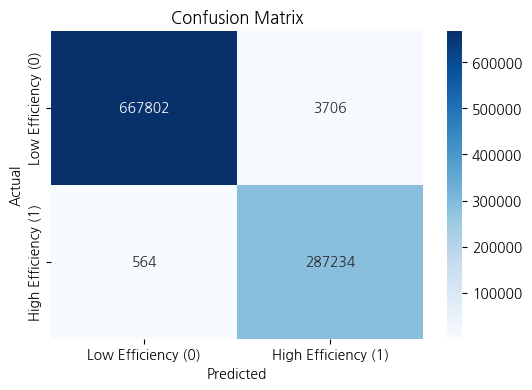

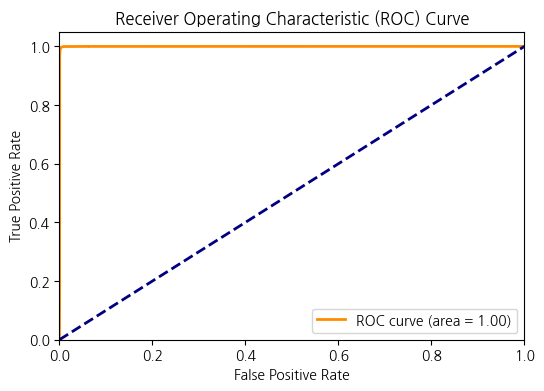

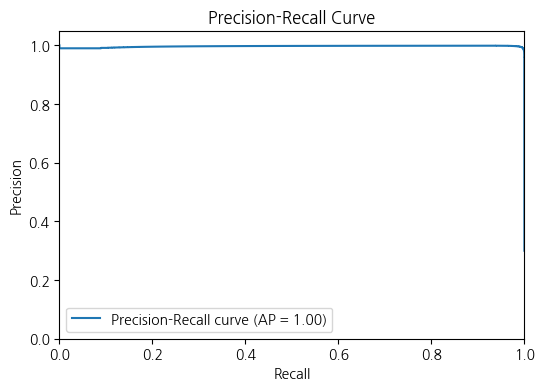

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Efficiency (0)', 'High Efficiency (1)'], yticklabels=['Low Efficiency (0)', 'High Efficiency (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.step(recall, precision, where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

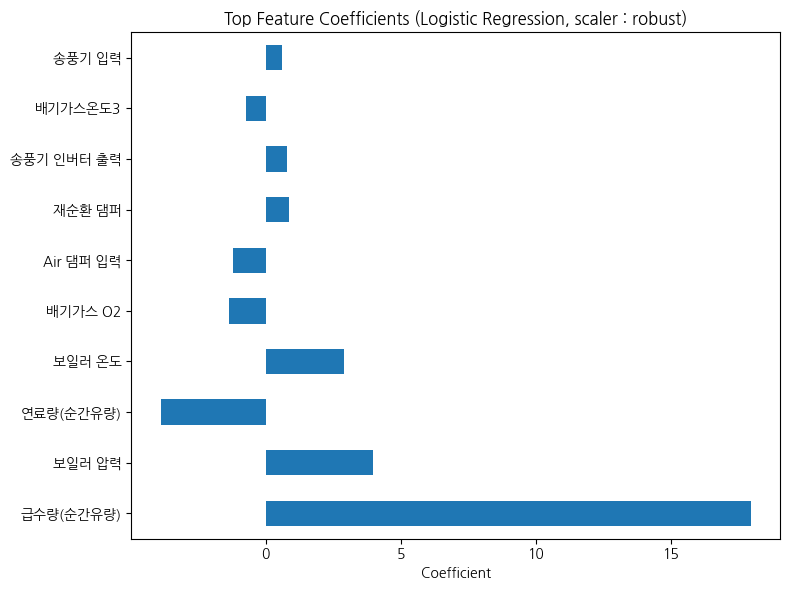

In [14]:
# === 기여도: 표준화 계수 Top 20 (빠름) ===
logit = best_pipe.named_steps["logit"]
coef_series = pd.Series(logit.coef_[0], index=X.columns, name="coef (scaled space)")
coef_abs = coef_series.abs().sort_values(ascending=False)

top_k = min(10, len(coef_series))
plt.figure(figsize=(8,6))
coef_series.loc[coef_abs.head(top_k).index].plot(kind="barh")
plt.title("Top Feature Coefficients (Logistic Regression, scaler : robust)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()